# MLE for Log-Normal Distribution

In this notebook you will perform [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood), or MLE, for the parameters in the [log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution) distribution and bootstrap the results.

## Problem description

Your exercise is to perform the following steps in this notebook:

* Find the probability density function, $P(x \mid \theta)$, with $\theta=\left[\mu,\sigma^2\right]$, for a single variate on Wikipedia and typeset it into a markdown cell. In that same markdown cell, compose a few sentences that describes the equation and defines all of its symbols.
* Work out the log-likelihood, $ln\mathcal{L}(\theta \mid x)$, and typeset it into another markdown cell. In that same markdown cell, compose a few sentences that describes the equation and defines all of its symbols.
* For known values of the parameters $\mu=0.5$ and $\sigma^2=1.0$, generate an array of `50` random variates.
* Make an appropriately labeled Seaborn `distplot` of your dataset.
* Write a Python function, `neg_log_llh(theta, data)`, that returns the negative log-likelihood for the full dataset and estimated $\hat{\theta}=\left[\hat{\mu},\hat{\sigma}^2\right]$.
* Use `interact` to print the value of the negative log-likelihood with one slider each for $\hat{\mu}$ and $\hat{\sigma}^2$. Find the values of $\hat{\mu}$ and $\hat{\sigma}^2$ that minimize the negative log-likelihood by simply moving the sliders around. Write some text in a markdown cell that summarizes your findings.
* Write a function, `mle(data)`, that uses `scipy.optimize.minimize` to find the estimated parameters $\hat{\theta}$ that minimize the negative log-likelihood for the data.
* Bootstrap your dataset and compute bootstrapped $\hat{\theta}$ distributions. Plot your $\hat{\theta}$ distribution using a Seaborn `jointplot`. Be very careful about making this distribution plot, paying close attention to the limits of the plot and outliers.
* Follow [PEP8](https://www.python.org/dev/peps/pep-0008/) and write a properly formatted [docstring](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt) for all of your functions.
* Add additional markdown cells that describe your code and results.

## Your solution

Here are the known, master parameters to use:

In [27]:
mu = 0.5
sigma2 = 1.0

$P(x \mid \theta)$, with $\theta=\left[\mu,\sigma^2\right] $
$$ P(x \mid \theta) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left[-\frac{(x-\mu)^2}{2 \sigma^2}\right]}$$
This equation represents a normal distribution where $\mu$ is the mean, $\sigma^2$ is the variance, and $e$ is Euler's number.

$$ ln \mathcal{L}(\mu,\sigma^2 \mid x) =  - \frac{1}{2} ln(2 \pi \sigma^2) - \frac{(x-\mu)^2}{2 \sigma^2} $$
This equation is the log of the probability density function $P(x \mid \theta)$, with $\theta=\left[\mu,\sigma^2\right] $ shown above. The symbols have the same meaning as described above.

In [28]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from ipywidgets import interact
from scipy.optimize import minimize

In [29]:
rand_data = np.random.normal(mu,sigma2, 50)

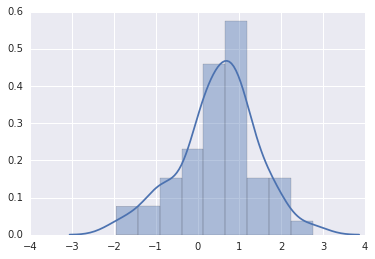

In [30]:
sns.distplot(rand_data)

In [31]:
def neg_log_llh(theta, data):
    """Return the negative log-likelihood for the normal distribution.
    
    Parameters
    ----------
    theta: tuple
        The parameters [mu, sigma**2] of the normal distribution.
    data: ndarra
        An array of data points that are being modelled by the normal distribution.
    """
    mu = theta[0]
    sigma2 = theta[1]
    n = len(data)
    result = 0.5*n*np.log(2.0*np.pi*sigma2) + (1.0/(2.0*sigma2))*np.sum((data-mu)**2)
    return result

In [52]:
def print_log_llh(mu, sigma2):
    """Print the negative log-likelihood for the normal distribution.
    
    Parameters
    ----------
    mu: float
        Mu of the normal distribution.
    sigma2: float
        Variance of the normal distribution.
    """
    print(neg_log_llh((mu, sigma2), rand_data))

In [53]:
interact(print_log_llh, mu=(-10.0, 10.0, 0.1), sigma2=(0.1, 10.0, 0.1));

92.2015835074


When mu is 0.6 and sigma2 is 0.9 the negative log-likelihood is minimized and is about 67.0606.

In [59]:
def mle(data):
    """Find the estimated parameters θ̂ that minimize the negative log-likelihood for the data.
    
    Parameters
    ----------
    data: ndarray of tuples
        Ndarray of the parameters [mu, sigma**2] of the normal distribution.
    """
    return minimize(lambda theta: neg_log_llh(theta, data), [-2.0, 2.0]).x

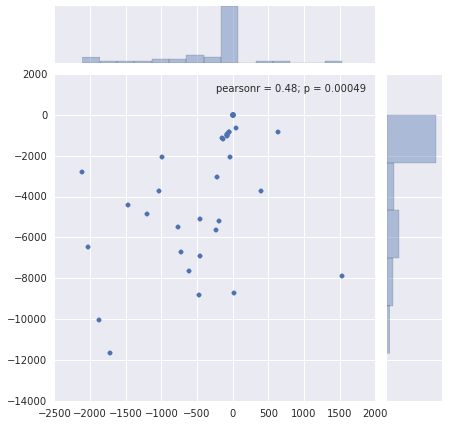

In [62]:
bootstrap = [mle(np.random.choice(rand_data,50)) for i in range(50)]
mu = np.array([t[0] for t in bootstrap])
sigma = np.array([t[1] for t in bootstrap])
sns.jointplot(mu,sigma)

## Grading

This cell will be used for grading!